# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
# Import packages including BeautifulSoup and Pandas

import requests 
from bs4 import BeautifulSoup
import pandas as pd 

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews 
df.head()

,reviews
0,✅ Trip Verified | Came from Glasgow to London...
1,✅ Trip Verified | My flight on on 12 May 2023...
2,Not Verified | Cairo is a 5 hour flight and B...
3,✅ Trip Verified | After travelling London to ...
4,✅ Trip Verified | My luggage was mis-tagged i...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# df.to_excel("C:\Portfolio\Data Engineer Track\Airline Datasets and Courses\British Airways_ The Forage Course\BA_reviews.xlsx")

In [6]:
df1 = pd.read_excel("C:\Portfolio\Data Engineer Track\Airline Datasets and Courses\British Airways_ The Forage Course\BA_reviews.xlsx")

In [7]:
df1.head()

,Unnamed: 0,reviews
0,0,We booked on the BA website round trip fligh...
1,1,First time flying with BA business class nev...
2,2,You can buy sandwiches and crisps but dont e...
3,3,This is a twoforone review covering economy ...
4,4,Absolutely horrible airline Communication is ...


In [8]:
# import the libraries to perform text preprocessing

import nltk
import string
import re

In [9]:
# make text lowercase

df1["reviews"] = df1["reviews"].str.lower()
df1.head()

,Unnamed: 0,reviews
0,0,we booked on the ba website round trip fligh...
1,1,first time flying with ba business class nev...
2,2,you can buy sandwiches and crisps but dont e...
3,3,this is a twoforone review covering economy ...
4,4,absolutely horrible airline communication is ...


In [10]:
# Remove stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [11]:
STOPWORDS = set(stopwords.words("english"))
def remove_stopwords(text):

    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df1["reviews_wo_stop"] = df1["reviews"].apply(lambda text: remove_stopwords(text))

df1.head()

,Unnamed: 0,reviews,reviews_wo_stop
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...


In [12]:
"""
# Did not work well and not as intended. 

# Stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df1["reviews_stemmed"] = df1["reviews_wo_stop"].apply(lambda text: stem_words(text))
df1.head()
"""

'\n# Did not work well and not as intended. \n\n# Stemming\n\nfrom nltk.stem.porter import PorterStemmer\n\nstemmer = PorterStemmer()\n\ndef stem_words(text):\n    return " ".join([stemmer.stem(word) for word in text.split()])\n\ndf1["reviews_stemmed"] = df1["reviews_wo_stop"].apply(lambda text: stem_words(text))\ndf1.head()\n'

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df1["reviews_lemmatized"] = df1["reviews_wo_stop"].apply(lambda text: lemmatize_words(text))

df1.head()

,Unnamed: 0,reviews,reviews_wo_stop,reviews_lemmatized
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...,book ba website round trip flight seattle amma...
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...,first time fly ba business class never board d...
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...,buy sandwich crisp dont expect hot meal plane ...
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...,twoforone review cover economy business class ...
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...,absolutely horrible airline communication terr...


In [14]:
# Lemmatization worked way better than stemming. Let's go with lemmatization. 

In [15]:
# Kaggle Tutorial NLP: https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing#Stemming

# Second tutorial: 

In [16]:
# Download VADER lexicon for sentiment analysis

nltk.download("vader_lexicon")

# Import the lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rakim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sentences = df1["reviews_lemmatized"] 

for sentence in sentences: 
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    

book ba website round trip flight seattle amman stop london business class first flight delay divert nyc enroute husband experience medical emergency land nyc take hospital stay constant contact airline agent arrange ambulance transfer even fly back home confirm cancellation remain flight agent airport next several week speak many time ba customer service try obtain kind refund meet contradictory explanation excuse absence meaningful customer service discover marked noshows flight amman return flight still active unable cancel return website despite book website phone call never return spend minimum 4060 minute hold every phone call make email receive canned reply without answer explanation tell possible receive copy ticket rule regulation speak supervisor several week abysmal customer service file complaint faa response complaint receive email ba customer service explain review many request full refund could accommodate due ticketing rule would issue flight credit except portion nosho

In [18]:
# Determining Sentiment Score column

df1['scores'] = df1['reviews_lemmatized'].apply(lambda reviews_lemmatized: analyzer.polarity_scores(reviews_lemmatized))

df1.head()



,Unnamed: 0,reviews,reviews_wo_stop,reviews_lemmatized,scores
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...,book ba website round trip flight seattle amma...,"{'neg': 0.088, 'neu': 0.816, 'pos': 0.096, 'co..."
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...,first time fly ba business class never board d...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp..."
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...,buy sandwich crisp dont expect hot meal plane ...,"{'neg': 0.044, 'neu': 0.821, 'pos': 0.136, 'co..."
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...,twoforone review cover economy business class ...,"{'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'co..."
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...,absolutely horrible airline communication terr...,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp..."


In [19]:
df1["compound"] = df1["scores"].apply(lambda 
                                     score_dict: score_dict["compound"])

df1.head()

,Unnamed: 0,reviews,reviews_wo_stop,reviews_lemmatized,scores,compound
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...,book ba website round trip flight seattle amma...,"{'neg': 0.088, 'neu': 0.816, 'pos': 0.096, 'co...",0.3818
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...,first time fly ba business class never board d...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...,buy sandwich crisp dont expect hot meal plane ...,"{'neg': 0.044, 'neu': 0.821, 'pos': 0.136, 'co...",0.3773
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...,twoforone review cover economy business class ...,"{'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'co...",0.8907
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...,absolutely horrible airline communication terr...,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp...",-0.9117


In [20]:
df1["comp_score"] = df1["compound"].apply(lambda c: 
"pos" if c >= 0 else "neg")

df1.head()

,Unnamed: 0,reviews,reviews_wo_stop,reviews_lemmatized,scores,compound,comp_score
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...,book ba website round trip flight seattle amma...,"{'neg': 0.088, 'neu': 0.816, 'pos': 0.096, 'co...",0.3818,pos
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...,first time fly ba business class never board d...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719,neg
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...,buy sandwich crisp dont expect hot meal plane ...,"{'neg': 0.044, 'neu': 0.821, 'pos': 0.136, 'co...",0.3773,pos
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...,twoforone review cover economy business class ...,"{'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'co...",0.8907,pos
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...,absolutely horrible airline communication terr...,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp...",-0.9117,neg


In [21]:
import seaborn 
import matplotlib_inline



In [22]:
# Statistics of review sentiment numerical score

df1["compound"].describe()

count    2000.000000
mean        0.233219
std         0.730658
min        -0.994400
25%        -0.557400
50%         0.545650
75%         0.922950
max         0.998200
Name: compound, dtype: float64

On average, most reviews are slightly positive (mean = 0.233219)

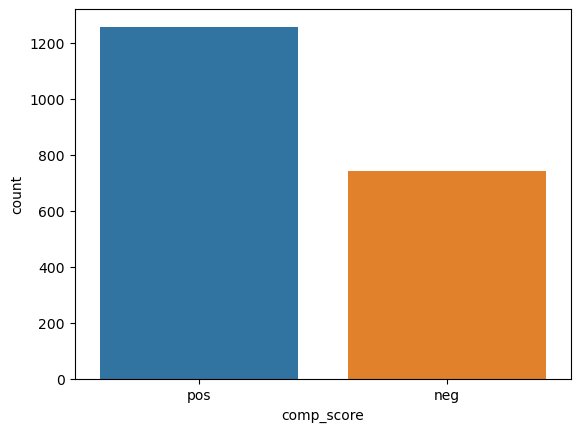

In [23]:
# Plot sentiment counts comp_score and compound

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df1, x = df1["comp_score"])
plt.show()

Most reviews are positive. Over 1200 out of 2000 reviews are positive. Nearly 700 reviews are negative. 

In [24]:
# Topic Modeling: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

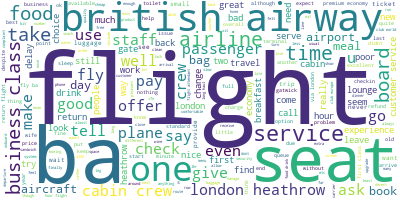

In [26]:
# Import the wordcloud library

from wordcloud import WordCloud

# Join the different processed titles together.

long_string = ','.join(list(df1["reviews_lemmatized"].values))

# Create a WordCloud object

wordcloud = WordCloud(background_color = "white", max_words = 5000,
contour_width= 3, contour_color = "steelblue")

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud

wordcloud.to_image()

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df = 0.8, min_df = 2, stop_words = "english")
doc_term_matrix = count_vect.fit_transform(df1["reviews_lemmatized"].values.astype("U"))

In [30]:
doc_term_matrix

<2000x5107 sparse matrix of type '<class 'numpy.int64'>'
	with 114236 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 5, random_state = 123)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=123)

In [32]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

read
barbados
telephone
untidy
cairo
comment
iad
limited
credit
stair


c:\Users\rakim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
first_topic = LDA.components_[0]

first_topic

array([0.23623603, 2.19837241, 0.20000035, ..., 3.02876854, 0.20004023,
       8.8751173 ])

In [36]:
top_topic_words = first_topic.argsort()[-10:]

top_topic_words

array([4558, 4091,  801,  417, 1371,  427, 2814,  846, 2378,  654],
      dtype=int64)

In [37]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

tell
service
book
airline
customer
airway
london
british
hour
ba


c:\Users\rakim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Seems like topic 1 is about British Airways and customer service at London's airport.

In [39]:
# Here are the top top words with highest probabilities for all five topics:

for i, topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['tell', 'service', 'book', 'airline', 'customer', 'airway', 'london', 'british', 'hour', 'ba']


Top 10 words for topic #1:
['crew', 'meal', 'passenger', 'food', 'cabin', 'business', 'class', 'service', 'ba', 'seat']


Top 10 words for topic #2:
['fly', 'london', 'cabin', 'economy', 'business', 'good', 'food', 'class', 'ba', 'seat']


Top 10 words for topic #3:
['heathrow', 'staff', 'good', 'service', 'cabin', 'time', 'london', 'board', 'seat', 'crew']


Top 10 words for topic #4:
['london', 'time', 'good', 'offer', 'drink', 'meal', 'ba', 'food', 'service', 'crew']




c:\Users\rakim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(2000, 5)

In [41]:
df1["Topic"] = topic_values.argmax(axis = 1)

In [42]:
df1.head()

,Unnamed: 0,reviews,reviews_wo_stop,reviews_lemmatized,scores,compound,comp_score,Topic
0,0,we booked on the ba website round trip fligh...,booked ba website round trip flights seattle a...,book ba website round trip flight seattle amma...,"{'neg': 0.088, 'neu': 0.816, 'pos': 0.096, 'co...",0.3818,pos,0
1,1,first time flying with ba business class nev...,first time flying ba business class never boar...,first time fly ba business class never board d...,"{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'comp...",-0.5719,neg,2
2,2,you can buy sandwiches and crisps but dont e...,buy sandwiches crisps dont expect hot meal pla...,buy sandwich crisp dont expect hot meal plane ...,"{'neg': 0.044, 'neu': 0.821, 'pos': 0.136, 'co...",0.3773,pos,1
3,3,this is a twoforone review covering economy ...,twoforone review covering economy business cla...,twoforone review cover economy business class ...,"{'neg': 0.082, 'neu': 0.745, 'pos': 0.173, 'co...",0.8907,pos,1
4,4,absolutely horrible airline communication is ...,absolutely horrible airline communication terr...,absolutely horrible airline communication terr...,"{'neg': 0.405, 'neu': 0.595, 'pos': 0.0, 'comp...",-0.9117,neg,0
